# Intoduction Data Science Course - Data Informatics Department METU




------------

### This work includes 
- Python and Jupyter notebook
- simple data cleaning
- descriptive statistics interpretation and
- visualizing methods


**1. Import pandas, numpy, matplotlib and seaborn libraries.**  
If you need another library or packages, you may upload them too.

In [1]:
from scipy import stats
import statsmodels.api as sm 
import pylab as py 

### answer ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**2. Upload the data as a pandas dataframe and show the first three rows.**

In [2]:
### answer ###
data = pd.read_csv('data.csv') # I called the data as data again
data.head(3) # to see first three rows

,number_of_room,neighbourhood,material_quality,age,distance,number_of_bathroom,area,balcony,thermal_insulation_point,air_quality,price
0,3,Moderate,B,15.01,685.0,1,97.0,yes,22.4,23.3,384.8
1,4,Moderate,D,0.19,373.0,2,180.0,no,21.1,21.2,1182.2
2,2,Moderate,C,19.37,635.0,1,135.0,yes,25.4,27.3,469.1


----------
### Data Explanation

**number_of_room:** number of room in the house    
**neighbourhood:** the score for the neighbourhood (very low, low, moderate, high, very high)    
**material_quality:** the material quality of the house    
**age:** age of the house (in years)    
**distance:** the distance to the nearest public transportation (in meters)     
**number_of_bathroom:** number of bathroom   
**area:** house area      
**balcony:** Does the house have a balcony?
**thermal_insulation_point:** score for thermal insulation    
**air_quality:** air quality in the neighbourhood    
**price:** price of the house (in USD K)    
     

**3. How many features and observations are there in the data set (rows x columns)?**

In [3]:
### answer ###
data.shape    # there are 3000 rows and 11 colums in the data

(3000, 11)

### <span style="background-color:#C91414">Usually you need to deal with low quality data </span> 

**4.Change encoding of the neighbourhood, material_quality and balcony as stated below.**       
For neighbourhood; Very Low=1, Low=2, Moderate=3, High=4, Very High=5   
For material_quality; A=1, B=2, C=3, D=4   
For balcony; no=0 , yes=1  

In [4]:
### answer ###
#Let's start with neighbourhood
data.neighbourhood.replace(('Very Low', 'Low', 'Moderate', 'High', 'Very High'), (1, 2, 3, 4, 5), inplace=True)
#For material quality 
data.material_quality.replace(('A', 'B', 'C', 'D'), (1, 2, 3, 4), inplace=True)
# For balcony
data.balcony.replace(('yes','no'),(1,0), inplace=True)

In [5]:
# to see types of the data, especially neighbourhood, material_quality and balcony type.
data.info() # after encoding them to numbers 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number_of_room            3000 non-null   int64  
 1   neighbourhood             2988 non-null   float64
 2   material_quality          2945 non-null   float64
 3   age                       3000 non-null   float64
 4   distance                  3000 non-null   float64
 5   number_of_bathroom        3000 non-null   int64  
 6   area                      3000 non-null   float64
 7   balcony                   2684 non-null   float64
 8   thermal_insulation_point  2977 non-null   float64
 9   air_quality               3000 non-null   float64
 10  price                     3000 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 257.9 KB


In [6]:
data.head(3) # Now we can see material_quality, balcony and neighbourhood values

,number_of_room,neighbourhood,material_quality,age,distance,number_of_bathroom,area,balcony,thermal_insulation_point,air_quality,price
0,3,3.0,2.0,15.01,685.0,1,97.0,1.0,22.4,23.3,384.8
1,4,3.0,4.0,0.19,373.0,2,180.0,0.0,21.1,21.2,1182.2
2,2,3.0,3.0,19.37,635.0,1,135.0,1.0,25.4,27.3,469.1


Notice that although some columns contain numerical values, sometimes they are not reflected in the describe() method. The reason of this, these columns are read as strings. If you face this problem, to fix it,  please run the below code.
> data= data.apply(pd.to_numeric)
   
Please be aware that the numeric encoding of a column does not mean that the variable/attribute itself is numerical.  


**5.Rename the name of "air_quality" column as "air_quality_score"**

In [7]:
print(data.columns) ## .columns returns the column names of the DataFrame.   

Index(['number_of_room', 'neighbourhood', 'material_quality', 'age',
       'distance', 'number_of_bathroom', 'area', 'balcony',
       'thermal_insulation_point', 'air_quality', 'price'],
      dtype='object')


In [8]:
### answer ###
data = data.rename(columns={'air_quality': 'air_quality_score'}) #I changed name of the column to air_quality_score

In [9]:
data.head(3) # you can see the data with the column name changed.

,number_of_room,neighbourhood,material_quality,age,distance,number_of_bathroom,area,balcony,thermal_insulation_point,air_quality_score,price
0,3,3.0,2.0,15.01,685.0,1,97.0,1.0,22.4,23.3,384.8
1,4,3.0,4.0,0.19,373.0,2,180.0,0.0,21.1,21.2,1182.2
2,2,3.0,3.0,19.37,635.0,1,135.0,1.0,25.4,27.3,469.1


Notice that some data points are missing. For example, see the value of the balcony by typing **print(data.iloc[64])**    
**6. Find and print the number of missing values in each column**

In [10]:
# print(data.iloc[64])
### answer ###
data.isnull().sum() # We see that some columns contain missing values, while others do not. 

number_of_room                0
neighbourhood                12
material_quality             55
age                           0
distance                      0
number_of_bathroom            0
area                          0
balcony                     316
thermal_insulation_point     23
air_quality_score             0
price                         0
dtype: int64

**7. Drop the columns which have more than %10 missing value rate.**

In [11]:
### answer ###
# Firstly we need to calculate missing value percentage, let's write a function to find missing_value rate

def missing_value_rate(data):
    print (round((data.isnull().sum() * 100/ len(data)),3)) # I rounded to 3.

missing_value_rate(data)
# We have seen that balcony column has more than %10 missing value rate.

number_of_room               0.000
neighbourhood                0.400
material_quality             1.833
age                          0.000
distance                     0.000
number_of_bathroom           0.000
area                         0.000
balcony                     10.533
thermal_insulation_point     0.767
air_quality_score            0.000
price                        0.000
dtype: float64


In [12]:
# Let's drop the balcony column from the data
data.drop(['balcony'], axis=1)

,number_of_room,neighbourhood,material_quality,age,distance,number_of_bathroom,area,thermal_insulation_point,air_quality_score,price
0,3,3.0,2.0,15.01,685.0,1,97.0,22.4,23.3,384.8
1,4,3.0,4.0,0.19,373.0,2,180.0,21.1,21.2,1182.2
2,2,3.0,3.0,19.37,635.0,1,135.0,25.4,27.3,469.1
3,3,3.0,2.0,24.44,671.0,1,122.0,30.0,50.7,325.8
4,4,5.0,1.0,4.20,635.0,2,157.0,24.8,41.4,734.2
...,...,...,...,...,...,...,...,...,...,...
2995,4,4.0,3.0,0.84,686.0,2,144.0,90.1,26.4,742.9
2996,3,2.0,1.0,17.09,568.0,1,97.0,66.3,32.8,586.8
2997,3,3.0,2.0,29.44,688.0,1,118.0,47.8,31.3,350.0
2998,2,4.0,2.0,11.79,577.0,1,70.0,75.4,29.8,720.2


In [13]:
data.head(2) # since I didn't use inplace=True argument balcony is still available in the data

,number_of_room,neighbourhood,material_quality,age,distance,number_of_bathroom,area,balcony,thermal_insulation_point,air_quality_score,price
0,3,3.0,2.0,15.01,685.0,1,97.0,1.0,22.4,23.3,384.8
1,4,3.0,4.0,0.19,373.0,2,180.0,0.0,21.1,21.2,1182.2


In [14]:
# to get rid of completely from this column I need to use this code
# data.drop(['balcony'], axis=1, inplace=True)

**8. Create a dataframe named data_wo_na by dropping the rows which have missing values.  
What is the shape (rows x columns) of newly created data frame "data_wo_na"?**   
Please do the rest of the assignment with data_wo_na.

In [15]:
len(data['balcony'])

3000

In [16]:
### answer ###
data_wo_na = data.dropna() # to drop rows which have missing values
data_wo_na.head(2) # to see new dataframe

,number_of_room,neighbourhood,material_quality,age,distance,number_of_bathroom,area,balcony,thermal_insulation_point,air_quality_score,price
0,3,3.0,2.0,15.01,685.0,1,97.0,1.0,22.4,23.3,384.8
1,4,3.0,4.0,0.19,373.0,2,180.0,0.0,21.1,21.2,1182.2


In [17]:
data_wo_na.shape # still have 11 columns but rows decreased from 3000 to 2602

(2602, 11)

**9. Summarize and briefly interpret the data with appropriate descriptive statistics.  
Comment on the distribution of the attributes (bell-shaped, left-skewed, right-skewed, or how peaked etc.) <font color=#C91414> just by looking at descriptive statistics.</font> 
While answering Q10, you may want to revise your comments.**    
Hint: The purpose of this question is to measure whether you can comment on the distribution of data by looking at descriptive statistics. 
However, just looking at the descriptive statistics is not always enough. For this reason, it is stated that after answering Q10 (after visualizing the data), you may want to revise your comments.

In [18]:
### answer ###
data_wo_na.describe()  #to comment on the distribution I looked in the describe() method.

,number_of_room,neighbourhood,material_quality,age,distance,number_of_bathroom,area,balcony,thermal_insulation_point,air_quality_score,price
count,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000
mean,2.781706,3.646042,2.162183,14.539228,612.777095,1.240200,110.987317,0.802844,59.906841,30.662529,627.078017
std,1.023749,1.148190,0.867535,10.136237,88.840138,0.427287,38.542260,0.397928,27.282318,11.412903,216.863917
min,1.000000,1.000000,1.000000,0.020000,17.000000,1.000000,35.000000,0.000000,20.600000,13.900000,114.900000
25%,2.000000,3.000000,1.000000,5.555000,580.000000,1.000000,76.000000,1.000000,28.000000,22.800000,464.425000
50%,3.000000,4.000000,2.000000,13.225000,639.000000,1.000000,115.000000,1.000000,73.250000,27.500000,608.500000
75%,4.000000,5.000000,3.000000,22.732500,676.000000,1.000000,141.000000,1.000000,85.400000,35.300000,760.025000
max,4.000000,5.000000,4.000000,45.510000,739.000000,2.000000,190.000000,1.000000,91.000000,99.600000,1298.500000


In [19]:
# data_wo_na.skew() to see skewness of the data

**Double click and write your explanations and comments here.**

* In this description there are discrete values such as:
number_of_room, neighbourhood, material_quality, number_of_bathroom, balcony. I will look at their countplots later.


* Let's start with age value:
Age value is continuous. Mean and median values are close to each other but mean value is greater than the median value. 
The mean value being greater than the median value and the distance of the maximum value from the median being 3 times the distance of the minimum value from the median suggested that it should be skewed to the right. But when I looked at the graph, I saw that this was not the case, it has a two-peak graph. The difference between the maximum and the minimum was large, but the frequency of the minimum values was higher. It is wrong to make this comment without knowing the frequency information.


* Let's talk about distance:
Here the difference between min and max value is very high, that is range is high. Standard deviation is also high, that means variability is high. From this perspective, distance seems left-skewed because of two reasons: median value is bigger than mean value, in addition to that difference between first quartile and min value is much bigger than the difference between max and the third quartile value. Also, values spread around median value but min value is far away from the median value.  


* Let's continue with area:
Area is comtinuous value.
Here again median value is higher than mean value, before looking at the graph, I thought it was skewed to the left because the median value was greater than the mean value, but without knowing the frequency of the values, it was not a correct interpretation. The graph is a three-peak graph.


* Thermal_insulation_point:
Here median valueis grater than the mean value. I thought that this variable was also skewed to the left before I saw the graph, not only because the median value is greater than the mean value, but also the difference between the median value and the 1st quartile is quite high compared to the difference between the 3rd quartile and the median. That's why I thought these values would create skewness to the left of the median value. But when I looked at the graph, I saw that it is a two-peak graph and the peaks are at their minimum and maximum values. Making comments without knowing the frequency of occurrence of values ​​can be misleading.


* Now, air_quality_score:
Here there is a different scenario becuase mean value is greater than median. The distance of the maximum value to the median value is much more than the distance of the minimum value to the median value.the distance of the maximum value to the median value is much more than the distance of the minimum value to the median value.  Air quality score seems positively skewed


* Finally, let's talk about price values:
Here median value is less than mean value but their values close to each other. The difference between the maximum and the median is larger than the difference between the median and the minimum, but the values are not too far apart. The difference in the data says there may be a slight right skew. When I looked at the graph, I saw a distribution close to the normal distribution with a slight right skew. We can say bell-shaped to its graph. Also, the difference between min and max value is very high,that is range is high.

**10. Visualize the distributions of the numeric attributes. Comment whether they are similar to Gaussian/Normal distirbution or not. Give your reasons and support them with appropriate visualization techniques.**     
Support your answer with what you found in the previous question.
Hint: You can use subplotting to see the several plots of same attribute at a one time.

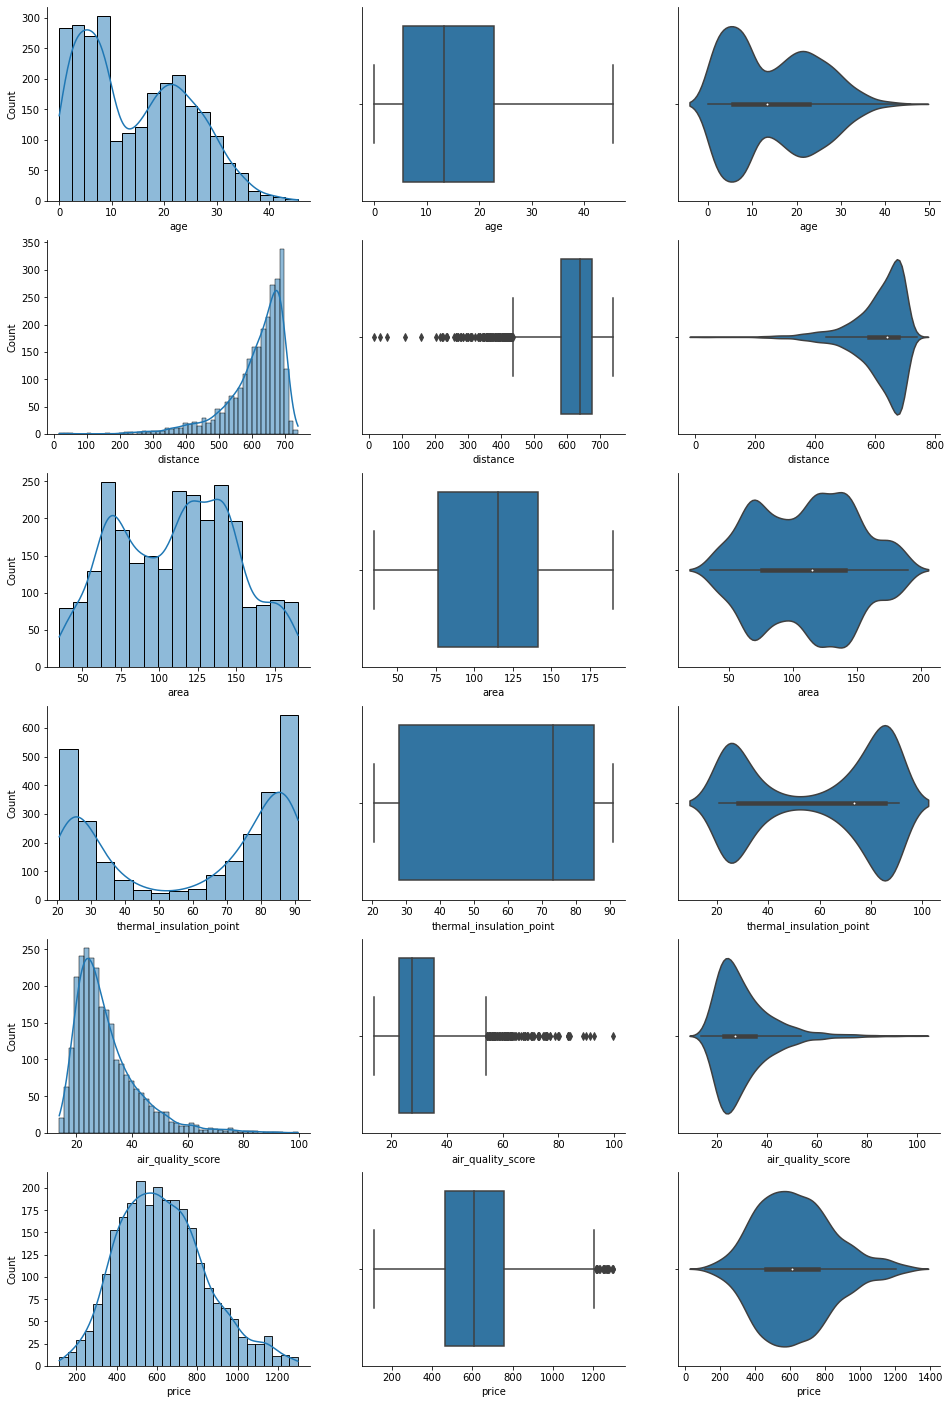

In [20]:
# answer

f, axes = plt.subplots(6, 3, figsize=(16, 25))
sns.despine(right=True)
count=0
data = data_wo_na[['age', 'distance', 'area','thermal_insulation_point', 'air_quality_score', 'price']]
for i in range(6):      
    sns.histplot(data.iloc[:,count], ax=axes[i,0], kde=True)
    sns.boxplot(x=data.iloc[:,count], ax=axes[i,1])
    sns.violinplot(x=data.iloc[:,count], ax=axes[i,2])
    count=count+1

**Double click and write your explanations here.**  

* Age: This histogram plot is bimodal distribution. There were no outliers in the boxplot, just seen two peaks in the violinplot also.


* Distance: This histogram plot seems left skewed, doesn't seem to be normal distribution. In the boxplot it can be seen there are outliers before 400 and these leads graph to be left skewed. Also, in violinplot before 400 tail of the violinplot is really long. I again shows outliers before 400. 


* Area: This histogram plot doesn't seem Normal distribution, there are 3 peaks. In the boxplot there were no outliers. 


* Thermal_insulation_point : Bimodal distribution, not normal. In the boxplot there are no outlier values.


* Air_quality_score :This histogram plot seems right skewed, don't seem to be normal distribution. In the box plot also seen that there are outliers after approximately 55, these outliers also moved the graph away from the normal distribution. As seen in the violin graph, its tail is formed as a long line away from the values showing the frequency.


* Price: When we look at the graphs for the price value, it seems to be similar to the normal distribution in the histogram graph, although the excess of data after 1200 creates some deviation from the normal distribution. In the boxplot created for the Price value, it is observed that the values after 1200 are outliers.

**11. For categoric attributes draw countplots and briefly comment on them.**  
Hint: You can use seaborn library. Please see the documentation via https://seaborn.pydata.org/api.html.

<AxesSubplot:xlabel='number_of_room', ylabel='count'>

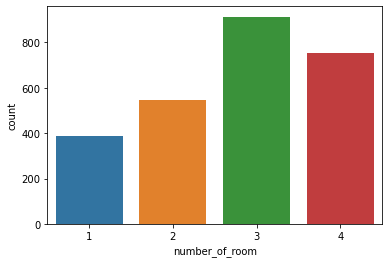

In [21]:
# answer
sns.countplot(x="number_of_room", data=data_wo_na)

* Number of rooms change between 1 and 4. In the data, 3-roomed houses have the highest number, while 1-room houses have the lowest number. In addition, the number of 3-roomed houses is more than twice the number of 1-room houses. After 3-room houses, the number of 4-roomed houses is the highest in the data, and this number is higher than the number of 2-roomed houses.

<AxesSubplot:xlabel='neighbourhood', ylabel='count'>

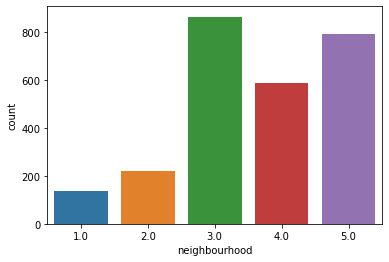

In [22]:
# answer
sns.countplot(x="neighbourhood", data=data_wo_na)

* *Neighbourhood*: In our data, neighborhood status are divided into 5 and numbered between 1 and 5. The majority of the houses in our data are concentrated in neighborhoods with neighborhood status of 3, 4 and 5. While the majority of the houses in our data were located in the neighborhood with the status of 3, the least number of houses was observed in the neighborhood with the status of 1.

<AxesSubplot:xlabel='material_quality', ylabel='count'>

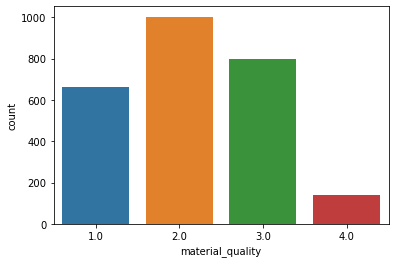

In [23]:
# answer
sns.countplot(x="material_quality", data=data_wo_na)

* *Material_quality* : Material quality numbered between 1 and 4. 
The number of houses numbered 2 for material quality is highest, while the number of houses numbered 4 for quality is the least.


<AxesSubplot:xlabel='number_of_bathroom', ylabel='count'>

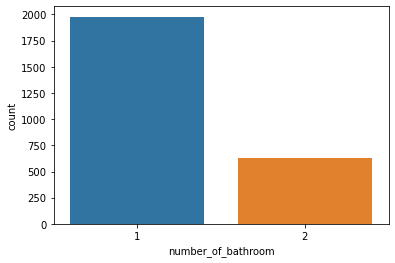

In [24]:
# answer
sns.countplot(x="number_of_bathroom", data=data_wo_na)

* *Number_of_bathroom* :
Most of the houses have 1 bathroom, approximately fifth of them have 2 bathrooms.

<AxesSubplot:xlabel='balcony', ylabel='count'>

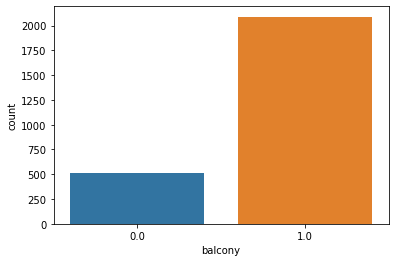

In [25]:
# answer
sns.countplot(x="balcony", data=data_wo_na)

**Double click and write your explanations and comments here.**
* *Balcony* :
While most of the houses in the data have a balcony, almost a fifth of them do not.

**12. Determine the appropriate descriptive location measure for each of the numerical attributes.**

**Double click and write your explanations and comments here.**

*Age*:  The mean may be a more robust sample estimator than the median. 

*Distance* is left skewed distribution, has many outliers.The median is usually preferred in these situations because the value of the mean can be distorted by the outliers. Geometric mean can also be applied.

*Area*: We need more than mean but mean can be estimator.

*Thermal_insulation_point*: The arithmetic mean will also be a poor measure of central tendency for a bimodal distribution,  Here it would be better to describe the data with two means, which would summarize each of the 'sub-distributions'.

*Air_quality score* is skewed distributions, The median may be an appropriate measure of location if the frequency distribution of the items is not symmetrical. Again mean sensitive to outliers, median can be appropriate. The mode can also be useful in this situation. Geometric mean can also be applied.

*Price* : I will use the median as the location estimator since graph seems to be normal.

**13. Find out whether there are any outliers and make one suggestion regarding how to deal with them.**

### answer ###
In question 10, I used boxplot to visualize them. There were outliers in distance, air quality score and price values. There are several ways to detect outliers other than boxplot. Standard deviation, IQR are some of those methods. I will use also standard deviation and IQR method to display outliers.

In [26]:
# Standard devaition method
def finding_outliers(data):
  # I've created empty list to gather anomalies
  anomalies = []

  data_std = np.std(data)  #  std values
  data_mean = np.mean(data) #  mean values
  anomaly_cut_off = data_std * 3

  # Here above the 3 times std plus mean values are outliers
  upper_limit = data_mean + anomaly_cut_off
  # Similarly below the mean minus 3 times std values are also outliers.
  lower_limit  = data_mean - anomaly_cut_off 

  print('Lower limit is:',lower_limit)
  print('Upper limit is:',upper_limit)

      # Generate outliers
  for outlier in data:
      if ((outlier > upper_limit) or (outlier < lower_limit)):
          anomalies.append(outlier)
  return len(anomalies) # we can return anomalies list return anomalies

In [27]:
finding_outliers(data_wo_na['area']) # area has no outliers according to std method

Lower limit is: -4.617241294304847
Upper limit is: 226.5918761905385


0

In [28]:
finding_outliers(data_wo_na['price']) # price attribute has outliers.

Lower limit is: -23.388703469188272
Upper limit is: 1277.544737289326


4

In [29]:
finding_outliers(data_wo_na['age']) # In the boxplot there were no outliers but acc. to std method age has one outlier value.

Lower limit is: -15.863638272660998
Upper limit is: 44.94209330724981


1

In [30]:
finding_outliers(data_wo_na['distance']) # distance has outliers in the boxplot also.

Lower limit is: 346.30790107760697
Upper limit is: 879.246288007712


44

In [31]:
finding_outliers(data_wo_na['thermal_insulation_point']) # there are no outliers in this method also.

Lower limit is: -21.924382568674396
Upper limit is: 141.73806435191807


0

In [32]:
finding_outliers(data_wo_na['air_quality_score']) # this column has outliers in the boxplot also.

Lower limit is: -3.569601222713409
Upper limit is: 64.89465887067655


47

In [33]:
# IQR Method- I just looked for the price value
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)

# Interquantile range method
IQR = Q3- Q1

Lower_lim = Q1 - 1.5* IQR 
print('Lower limit is:', Lower_lim)
Upper_lim = Q3 + 1.5*IQR
print('Upper limit is :', Upper_lim)

outlier = []
price = data_wo_na['price']
for i in price:
  if (i> Upper_lim):
    outlier.append(i)

  elif (i < Lower_lim):
    outlier.append(i)

print(outlier)
print('Length of the outlier list is:', len(outlier)) # length of the outlier is 

Lower limit is: 21.02499999999992
Upper limit is : 1203.425
[1254.0, 1275.3, 1218.2, 1261.5, 1297.8, 1214.1, 1267.5, 1218.9, 1218.9, 1268.1, 1212.1, 1275.4, 1220.1, 1218.1, 1280.7, 1246.1, 1230.8, 1254.8, 1291.8, 1256.4, 1233.4, 1298.5, 1246.3]
Length of the outlier list is: 23


**Double click and write your explanations and comments here.**
* First of all, there are multiple methods to find outliers. I looked at two of them above. When we looked with boxplot, we saw outliers in 3 columns, but when we looked with standard deviation method, we found outliers in 4 columns. There are also differences in the outlier values that I found according to the diffrent methods. For example, when I used standar deviation method in price column, I've found 4 outliers, but in IQR method it was 23.


* There are also multiple methods to deal with outliers. If the percentage of the outlier is not very large, it can be removed from the data in some cases. But in cases where the percentage is high, it is not the right way to delete it from the data. Since the mean value is highly affected by the outliers, in some cases we may need to replace the outliers with the median values.

**14. Visualize the distributions of all numeric attributes grouped by the "number_of_room" variable using violin plots. Comment on the results.**  
Hint: Please see the seaborn library documentation via https://seaborn.pydata.org/api.html.

<AxesSubplot:xlabel='number_of_room', ylabel='price'>

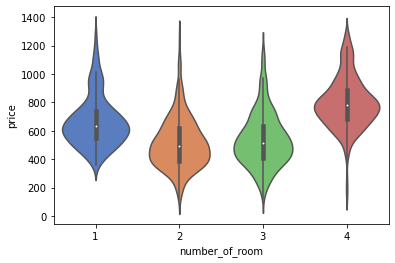

In [34]:
### answer ###
# I've grouped by number_of_room, y axis shows price values
sns.violinplot(x="number_of_room", y="price",
                    data=data_wo_na, palette="muted")

** These violin plots shows price values according to number of rooms. Firstly, the price values that house prices frequently show are similar in 2-room and 3-room houses. Median values also similar in 2-room and 3-room houses.
While the most frequent price is around 600 in 1-room houses, it is around 800 in 4-room houses. 
From here, it is seen that the price of the 4-room houses is higher than the value in which the other 3 graphs show the most distribution.

<AxesSubplot:xlabel='number_of_room', ylabel='age'>

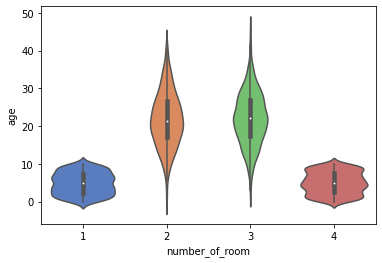

In [35]:
sns.violinplot(x="number_of_room", y="age",
                    data=data_wo_na, palette="muted")

**Here it can be seen that when the number of rooms 2 or 3 median of houses' age values close to each other. While the number of rooms is 1 or 4, the ages of the houses are younger, while the number of rooms is 2 or 3, the houses are generally older. In addition, the number of rooms is similar to the median values of the houses with 1 or 4 rooms. Also frequencies of data points in 1 and 4 are higher than 2 and 3.

<AxesSubplot:xlabel='number_of_room', ylabel='distance'>

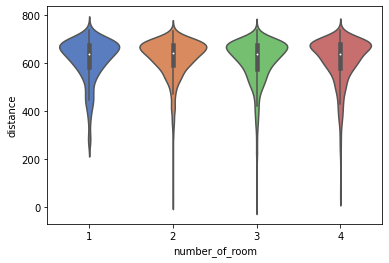

In [36]:
sns.violinplot(x="number_of_room", y="distance",
                    data=data_wo_na, palette="muted")

These violin plots show distance values according to number of rooms in the houses. The values of the density of the distance of the houses to the nearest public transport are similar in all 4 graphs. Although there are houses very close to public transportation in the houses with 2, 3 and 4 rooms, the minimum distance in the houses with 1 room starts from around 200 m.

<AxesSubplot:xlabel='number_of_room', ylabel='area'>

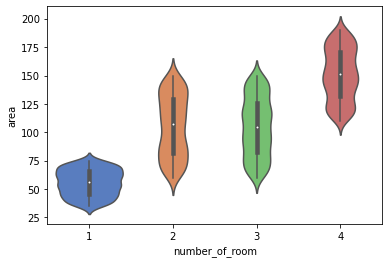

In [37]:
sns.violinplot(x="number_of_room", y="area",
                    data=data_wo_na, palette="muted")

Surprised here that the 2 and 3 bedroom houses have similar areas. While the area is expected to increase as the number of rooms increases, similar areas are observed in the houses with 2 and 3 rooms. While the area of 1-room houses is the least, the area of 4-room houses is the most. Another remarkable detail is that the spread of 1-room houses is wide and the length of the graph is short. In other words, the values of the area are close to each other and the houses show a wide spread in this range. In the other 3 graphs, the field values are more variable and their spreads are narrower.

<AxesSubplot:xlabel='number_of_room', ylabel='air_quality_score'>

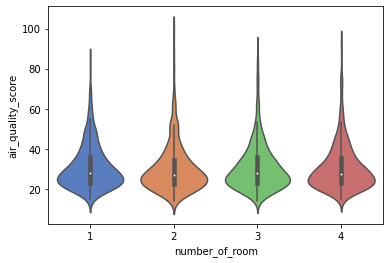

In [38]:
sns.violinplot(x="number_of_room", y="air_quality_score",
                    data=data_wo_na, palette="muted")

These violin plots show that the median of the air quality score in the houses is similar even though the number of rooms in the houses varies. In the graphics, the minimum and maximum values of the air score showed similar spreads regardless of the number of rooms. The striking difference here started with the air quality score above 60, the house with the highest value was seen in 2-room houses, then the house with the highest value was seen in the 4-room house.

<AxesSubplot:xlabel='number_of_room', ylabel='thermal_insulation_point'>

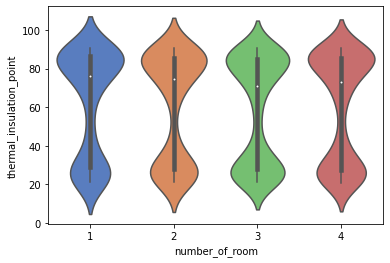

In [39]:
sns.violinplot(x="number_of_room", y="thermal_insulation_point",
                    data=data_wo_na, palette="muted")

These graphs have a two-peak distribution. Although the distributions look similar, there are slight differences. 
For example, the spread of the lower part of the violin graph of the 3-room house showed a wider distribution than that of the 1-room house. Although the median values ​​of the thermal insulation point are close in the houses, the highest value was seen in the houses with 1 room.

**Double click and write your explanations and comments here.**

I've explained them in the box below each chart.

**15. What does the below violin plot show? Explain.**

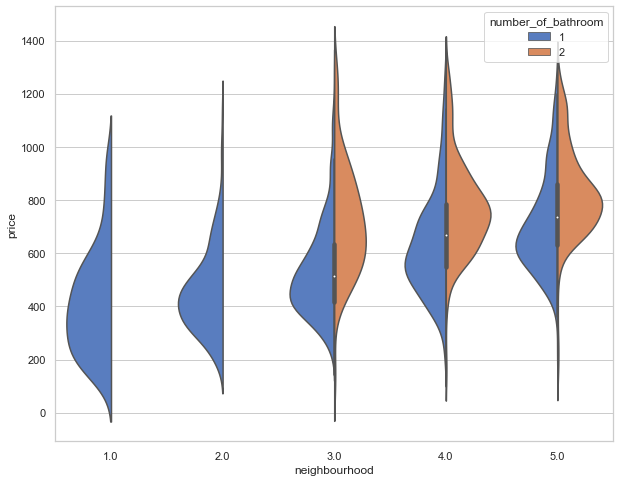

In [40]:
### answer ###
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x="neighbourhood",y="price", hue="number_of_bathroom",  data=data_wo_na, palette="muted", split=True)
# I got error with data_wo_na, I changed it to data

**Double click and write your explanations and comments here.**

These violin plots say when neighbourhood condition is very low or low, houses don't have 2 bathrooms. After moderate conditions houses can have 2 bathrooms. Also according to median values in moderate neighbourhoods prices are less than high or very high neighbourhoods prices'. House prices in neighbourhoods with high and very high standards are closer to each other than the others, but the median value of the prices in the neighbourhood with the highest standard is higher. However, it is still seen that the minimum value of the moderate neighborhood's price is lower than the minimum value of the high neighborhood' price, and this minimum value is lower than the minimum value in the highest neighborhood. These explanations also apply to maximum values.
Now let's talk about the frequency of occurrence of prices. In Neighborhood 1, the prices between 200-600 were seen more frequently than the other prices, and the most concentrated in the place just below 400. In neighborhood 2, the highest concentration was seen around 400. According to the number of 1 and 2 bathrooms in Neighborhood 3, concentrations were seen in different prices. While the number of bathrooms is 1, the area where the price is most common is above 400 and below 600, while 600 is the place where the prices are most common in houses where the number of bathrooms is 2. Violin graphics of neighbourhood 4 and 5 are similar considering the number of bathrooms. In other words, as the number of bathrooms increased, the frequency with which the price values of both were seen increased to a higher price. But still the frequent prices in neighbourhood 5 are higher than the frequent prices in neighbourhood 4.

**16. Let's first create an array which has an exponential distribution. The code below is an example, you can change the parameters as you want or leave it as is.**

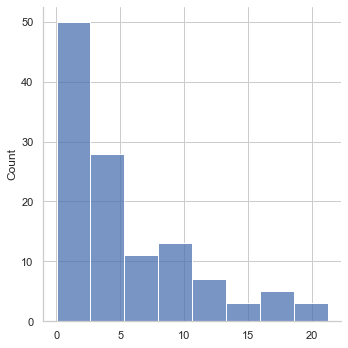

In [41]:
np.random.seed(5) # for reproducibility
array= np.random.exponential(scale=5,size=120)
sns.displot(array)

take_samples_from_given_data_calculate_mean: This function takes a sample from the given data with the specified sample size, then calculates the mean of this sample.
For example, take_samples_from_given_data_calculate_mean(array,3) it takes three elements of the array randomly and calculates the mean of them.
Let's take samples from array n=10 times and visualize the distribution of the means of these samples.


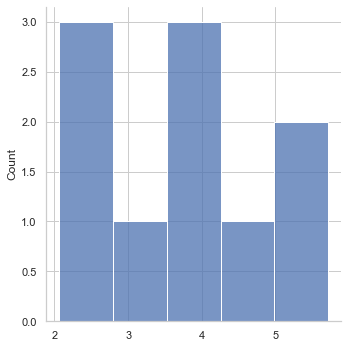

In [42]:
def take_samples_from_given_data_calculate_mean(data, sample_size):
    sample=np.random.choice(data,sample_size, replace=False)
    return np.mean(sample)

n=10
samples_mean_list=[]
for i in range (n):
    samples_mean_list.append(take_samples_from_given_data_calculate_mean(data=array,sample_size=7))  
sns.displot(samples_mean_list)

Now repeat this visualization step for  n=50, n=100, n=500 and n=5000 and comment on your findings.

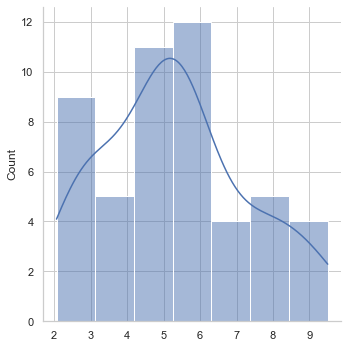

In [43]:
# answer
n=50
samples_mean_list=[]
for i in range (n):
    samples_mean_list.append(take_samples_from_given_data_calculate_mean(data=array,sample_size=7))  
sns.displot(samples_mean_list,kde=True)

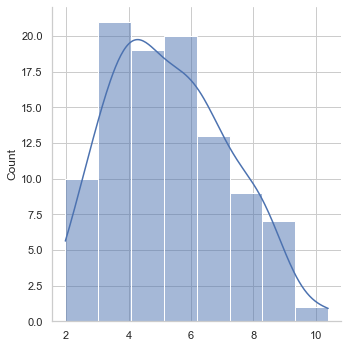

In [44]:
n=100
samples_mean_list=[]
for i in range (n):
    samples_mean_list.append(take_samples_from_given_data_calculate_mean(data=array,sample_size=7))  
sns.displot(samples_mean_list, kde=True)

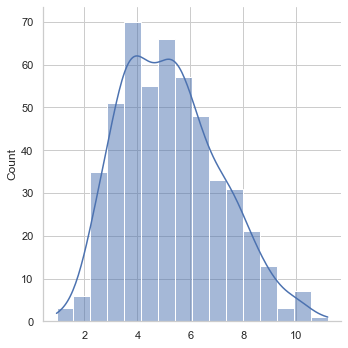

In [45]:
n=500
samples_mean_list=[]
for i in range (n):
    samples_mean_list.append(take_samples_from_given_data_calculate_mean(data=array,sample_size=7))  
sns.displot(samples_mean_list, kde=True)

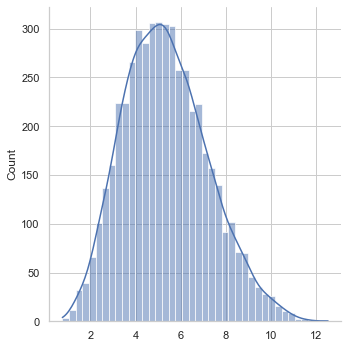

In [46]:
n=5000
samples_mean_list=[]
for i in range (n):
    samples_mean_list.append(take_samples_from_given_data_calculate_mean(data=array,sample_size=7))  
sns.displot(samples_mean_list, kde=True)

As can be seen from the graphs, as the number of n increases, the graphs get closer to the normal distribution. Mean mode and median values converged as n increased. When the n number is 100, the mode values ​​and the median values are quite different from each other, while when the n value is 5000, these values are much closer to each other. As the number of N increases, the graph will approach the normal distribution. When I take the n value of 50000 in the graph below, the normal distribution is seen much more clearly.

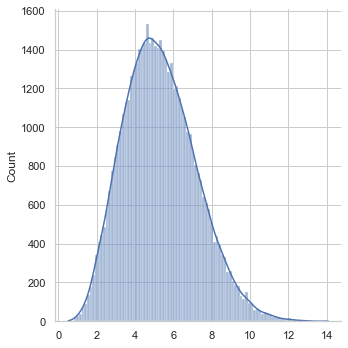

In [47]:
n=50000
samples_mean_list=[]
for i in range (n):
    samples_mean_list.append(take_samples_from_given_data_calculate_mean(data=array,sample_size=7))  
sns.displot(samples_mean_list, kde=True)